In [1]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
#loaddata
images = []
ages = []

for i in os.listdir('/kaggle/input/face-utk/Face_Detection/Face_Detection'):
    split = i.split('_')
    ages.append(int(split[0]))
    images.append(Image.open('/kaggle/input/face-utk/Face_Detection/Face_Detection/' + i))

In [3]:
images = pd.Series(list(images), name='Images')
ages = pd.Series(list(ages), name='Ages')

df = pd.concat([images, ages], axis=1)
df

,Images,Ages
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,17
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,18
...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,28
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,8


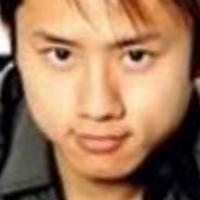

26


In [4]:
display(df['Images'][0])
print(df['Ages'][0])

**Visualising and Preparing Data**

/tmp/ipykernel_35/409036286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ages', ylabel='Density'>

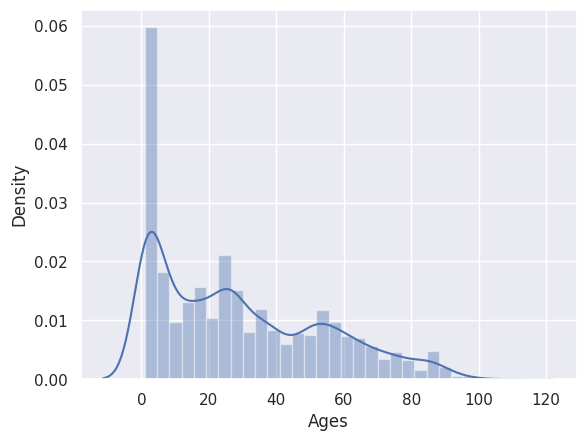

In [5]:
sns.set_theme()
sns.distplot(df['Ages'], kde=True, bins=30)

/tmp/ipykernel_35/1271551252.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ages', ylabel='Density'>

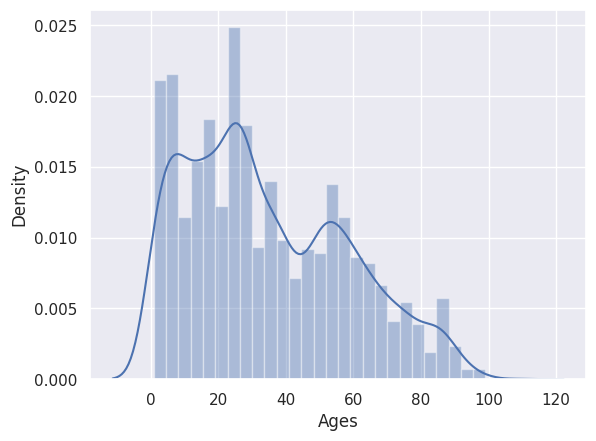

In [6]:
# chỉ đưa vào 1/3 số tuổi từ 0 đến 4 vì ở tuổi này có quá nhiều
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index=True)
sns.distplot(df['Ages'], kde=True, bins=30)

/tmp/ipykernel_35/2799000247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ages', ylabel='Density'>

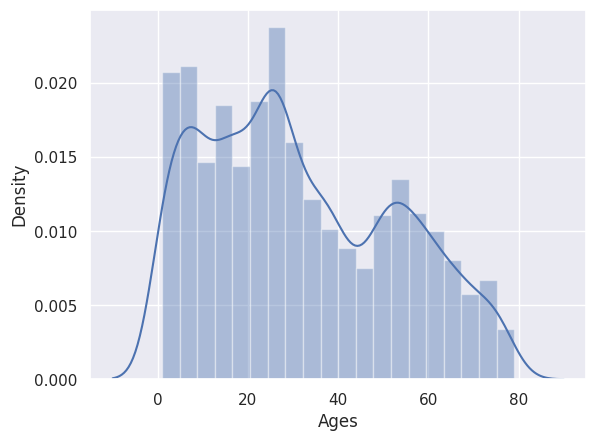

In [7]:
# loại bỏ tuổi từ 80 trở đi vì có ít dữ liệu
df = df[df['Ages'] < 80]
sns.distplot(df['Ages'], kde=True, bins=20)

In [8]:
x = []
y = []

for _, row in df.iterrows():
    # Resize ảnh
    img_resized = row['Images'].resize((200, 200), Image.Resampling.LANCZOS)
    # Chuyển sang array
    img_array = np.asarray(img_resized)
    x.append(img_array)

    # Lưu nhãn
    age = int(row['Ages'])
    y.append([age])

x = np.array(x)
y = np.array(y)

**Train test split**

In [9]:
y_age = df['Ages']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

In [2]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(Conv2D(64, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(Conv2D(128, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='linear'))

agemodel.compile(
    loss='mean_squared_error',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)


In [3]:
agemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [11]:
agemodel2 = Sequential()
agemodel2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
agemodel2.add(MaxPooling2D((2, 2)))
agemodel2.add(Conv2D(64, (3, 3), activation='relu'))
agemodel2.add(MaxPooling2D((2, 2)))
agemodel2.add(Conv2D(128, (3, 3), activation='relu'))
agemodel2.add(MaxPooling2D((2, 2)))
agemodel2.add(Flatten())
agemodel2.add(Dense(64, activation='relu'))
agemodel2.add(Dropout(0.5))
agemodel2.add(Dense(1, activation='relu'))

agemodel2.compile(
    loss='mean_squared_error',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

In [15]:
agemodel3 = Sequential()

agemodel3.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
agemodel3.add(BatchNormalization())
agemodel3.add(Activation('relu'))
agemodel3.add(MaxPooling2D((2, 2)))

agemodel3.add(Conv2D(64, (3, 3)))
agemodel3.add(BatchNormalization())
agemodel3.add(Activation('relu'))
agemodel3.add(MaxPooling2D((2, 2)))

agemodel3.add(Conv2D(128, (3, 3)))
agemodel3.add(BatchNormalization())
agemodel3.add(Activation('relu'))
agemodel3.add(MaxPooling2D((2, 2)))

agemodel3.add(Flatten())
agemodel3.add(Dense(64))
agemodel3.add(BatchNormalization())
agemodel3.add(Activation('relu'))
agemodel3.add(Dropout(0.5))
agemodel3.add(Dense(1, activation='linear'))

agemodel3.compile(
    loss='mean_squared_error',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)


**Training**

In [16]:
datagen = ImageDataGenerator(
    rescale=1. / 255., width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
    x_test_age, y_test_age,
    batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1748416450.227454      97 service.cc:148] XLA service 0x7cd6f8006d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748416450.228184      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748416450.528328      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/161 ━━━━━━━━━━━━━━━━━━━━ 16:59 6s/step - loss: 1574.2980 - mae: 33.6939

I0000 00:00:1748416454.260254      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 240ms/step - loss: 692.7815 - mae: 21.3918 - val_loss: 445.8303 - val_mae: 17.6543
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - loss: 508.0249 - mae: 18.6715 - val_loss: 410.4164 - val_mae: 16.5212
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - loss: 455.3208 - mae: 17.3107 - val_loss: 334.4823 - val_mae: 14.8144
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - loss: 397.2731 - mae: 16.0814 - val_loss: 322.0908 - val_mae: 14.7549
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 231ms/step - loss: 378.9764 - mae: 15.6028 - val_loss: 286.2357 - val_mae: 13.4166
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - loss: 371.7372 - mae: 15.3443 - val_loss: 293.9637 - val_mae: 13.2134
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - loss: 358.5485 - mae: 14.9794 - val_loss: 315.8399 - val_mae: 13.6185
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 231ms/step - loss: 345.8463 - mae: 14.7111 - val_loss: 311.6608 - val_mae: 13.

In [17]:
datagen = ImageDataGenerator(
    rescale=1. / 255., width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train2 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test2 = test_datagen.flow(
    x_test_age, y_test_age,
    batch_size=32)

history2 = agemodel2.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - loss: 733.2623 - mae: 21.8051 - val_loss: 455.1207 - val_mae: 17.8047
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - loss: 501.9404 - mae: 18.4288 - val_loss: 427.1608 - val_mae: 17.0779
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - loss: 484.2575 - mae: 18.1106 - val_loss: 374.7662 - val_mae: 15.8511
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 228ms/step - loss: 411.7931 - mae: 16.5817 - val_loss: 322.6375 - val_mae: 14.5832
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - loss: 390.0869 - mae: 15.8619 - val_loss: 302.8155 - val_mae: 13.9367
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - loss: 366.8414 - mae: 15.3320 - val_loss: 318.7885 - val_mae: 13.9714
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 233ms/step - loss: 372.6122 - mae: 15.4027 - val_loss: 299.1314 - val_mae: 13.5627
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - loss: 363.8006 - mae: 15.2780 - val_loss: 334.9873 - v

In [18]:
datagen_age3 = ImageDataGenerator(
    rescale=1. / 255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
test_datagen_age3 = ImageDataGenerator(rescale=1. / 255.)
train_generator_age3 = datagen_age3.flow(
    x_train_age, y_train_age,
    batch_size=32,
    shuffle=True
)
validation_generator_age3 = test_datagen_age3.flow(
    x_test_age, y_test_age,
    batch_size=32,
    shuffle=False
)
history3 = agemodel3.fit(
    train_generator_age3,
    epochs=50,
    validation_data=validation_generator_age3
)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 243ms/step - loss: 1441.2874 - mae: 32.2915 - val_loss: 1452.6364 - val_mae: 32.0387
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - loss: 1343.7972 - mae: 31.5843 - val_loss: 1435.8124 - val_mae: 32.3744
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - loss: 1303.0319 - mae: 31.2663 - val_loss: 1451.5090 - val_mae: 33.2618
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - loss: 1231.5026 - mae: 30.2576 - val_loss: 1248.4930 - val_mae: 30.6528
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - loss: 1259.6302 - mae: 30.5477 - val_loss: 1280.5791 - val_mae: 31.2546
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - loss: 1235.4285 - mae: 30.2326 - val_loss: 1101.2534 - val_mae: 28.6635
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 238ms/step - loss: 1170.6237 - mae: 29.5774 - val_loss: 1230.7207 - val_mae: 30.6257
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - loss: 1142.8558 - mae: 29.0870 - val_los

**Evaluating the Models**

In [19]:
agemodel.save('/kaggle/working/agemodel.h5')

agemodel2.save('/kaggle/working/agemodel2.h5')

agemodel3.save('/kaggle/working/agemodel3.h5')


In [25]:
import zipfile

zip_path = '/kaggle/working/all_models.zip'

with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write('/kaggle/working/agemodel.h5', arcname='agemodel.h5')
    zipf.write('/kaggle/working/agemodel2.h5', arcname='agemodel2.h5')
    zipf.write('/kaggle/working/agemodel3.h5', arcname='agemodel3.h5')


In [33]:
from IPython.display import FileLink

FileLink('all_models.zip')


/kaggle/working/all_models.zip

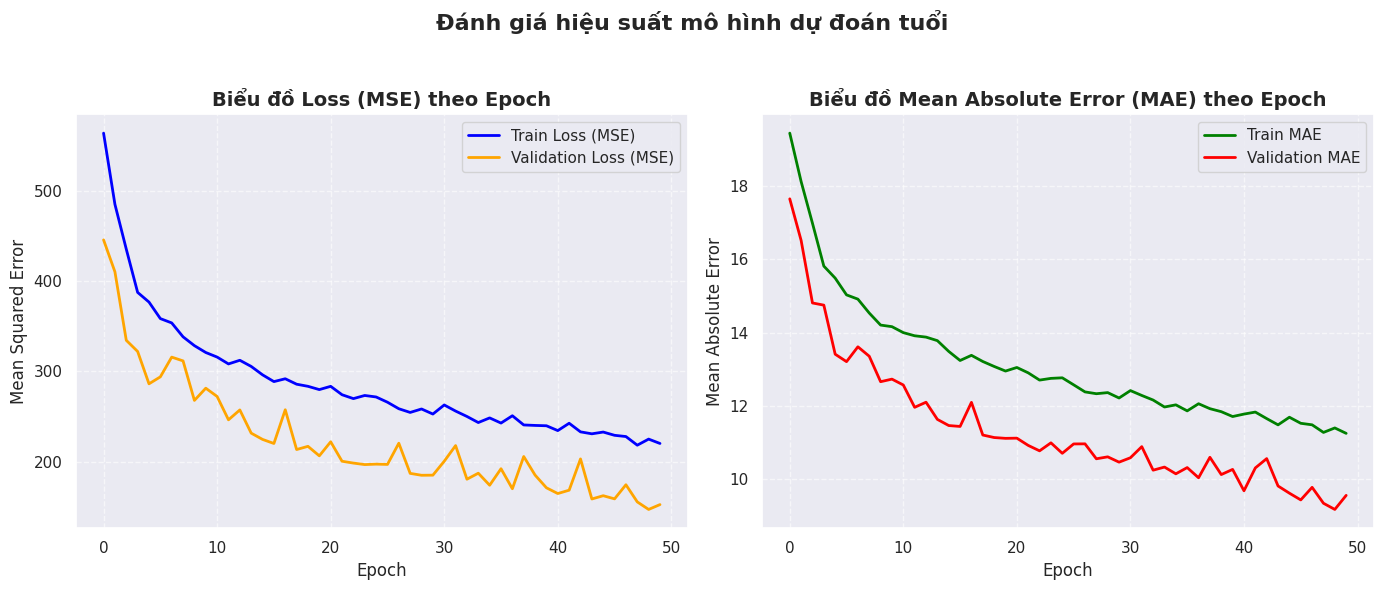

In [28]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14, 6))

# Biểu đồ Loss (Mean Squared Error)
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss (MSE)', color='blue', linewidth=2)
plt.plot(history1.history['val_loss'], label='Validation Loss (MSE)', color='orange', linewidth=2)
plt.title('Biểu đồ Loss (MSE) theo Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Biểu đồ MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history1.history['mae'], label='Train MAE', color='green', linewidth=2)
plt.plot(history1.history['val_mae'], label='Validation MAE', color='red', linewidth=2)
plt.title('Biểu đồ Mean Absolute Error (MAE) theo Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Đánh giá hiệu suất mô hình dự đoán tuổi', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

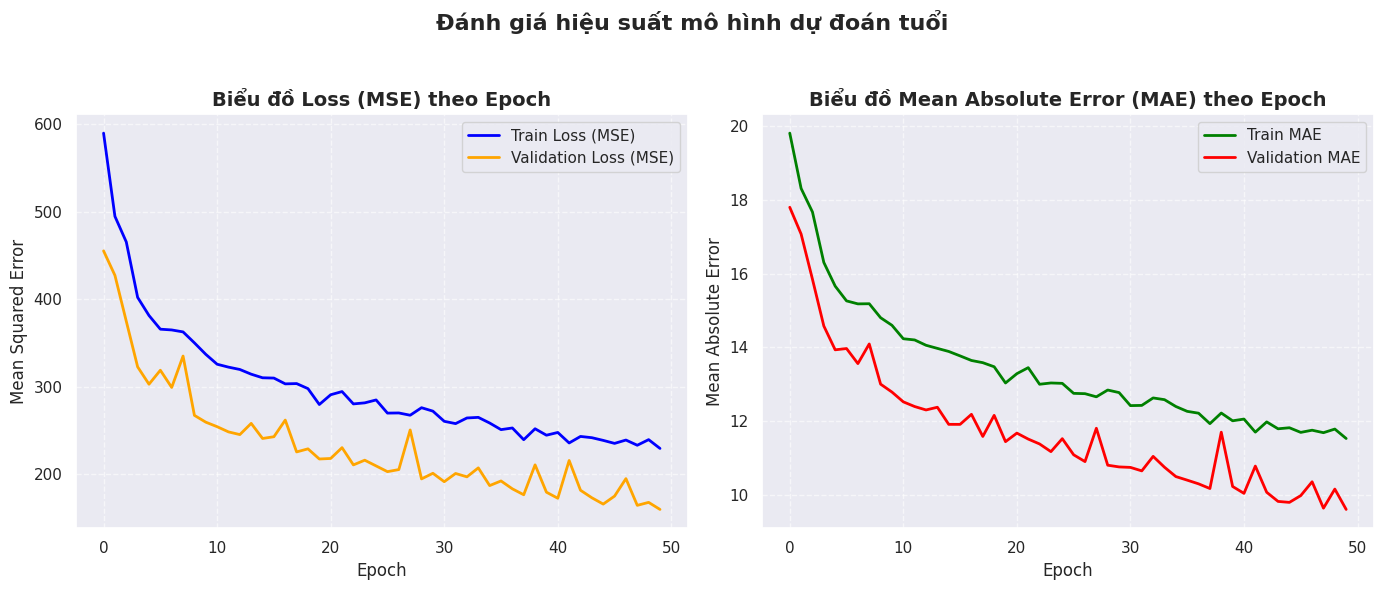

In [29]:
plt.figure(figsize=(14, 6))

# Biểu đồ Loss (Mean Squared Error)
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss (MSE)', color='blue', linewidth=2)
plt.plot(history2.history['val_loss'], label='Validation Loss (MSE)', color='orange', linewidth=2)
plt.title('Biểu đồ Loss (MSE) theo Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Biểu đồ MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history2.history['mae'], label='Train MAE', color='green', linewidth=2)
plt.plot(history2.history['val_mae'], label='Validation MAE', color='red', linewidth=2)
plt.title('Biểu đồ Mean Absolute Error (MAE) theo Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Đánh giá hiệu suất mô hình dự đoán tuổi', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

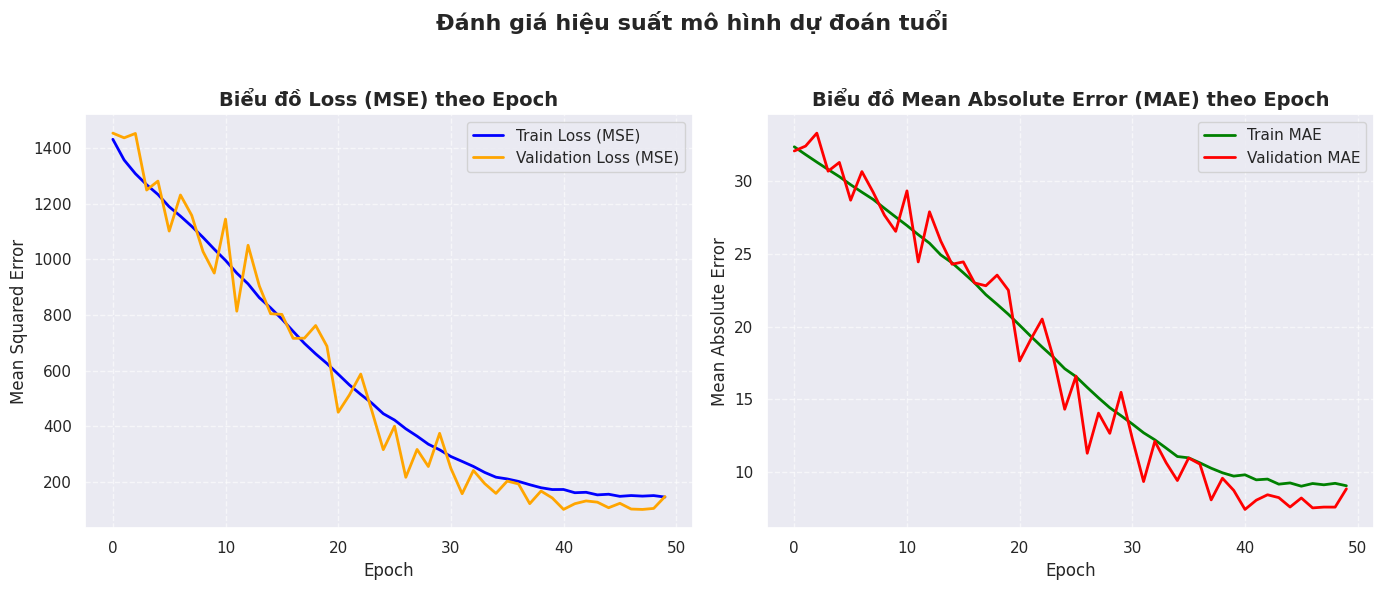

In [30]:
plt.figure(figsize=(14, 6))

# Biểu đồ Loss (Mean Squared Error)
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Train Loss (MSE)', color='blue', linewidth=2)
plt.plot(history3.history['val_loss'], label='Validation Loss (MSE)', color='orange', linewidth=2)
plt.title('Biểu đồ Loss (MSE) theo Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Biểu đồ MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history3.history['mae'], label='Train MAE', color='green', linewidth=2)
plt.plot(history3.history['val_mae'], label='Validation MAE', color='red', linewidth=2)
plt.title('Biểu đồ Mean Absolute Error (MAE) theo Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Đánh giá hiệu suất mô hình dự đoán tuổi', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()